[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Species of seed

b) Height of plant

c) Number of seeds in a row

d) Height of plant

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions. 

In [9]:
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


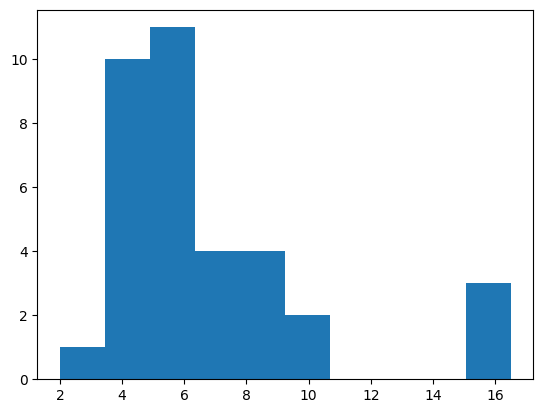

In [29]:
plt.hist(carbon_west['CO2'])
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [11]:
print(f'Mean: {carbon_west['CO2'].mean()}')
print(f'Median: {carbon_west['CO2'].median()}')
print(f'Standard Deviation: {carbon_west['CO2'].std()}')

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [12]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [22]:
murders.shape

(51, 2)

In [21]:
murders_no_DC = murders[murders['state'] != 'DC']
murders_no_DC.shape

(50, 2)

Part a. Find the mean and standard deviation for murders without D.C.

In [20]:
print(f'Mean: {murders_no_DC['murder'].mean()}')
print(f'Median: {murders_no_DC['murder'].median()}')
print(f'Standard Deviation: {murders_no_DC['murder'].std()}')

Mean: 4.874
Median: 4.85
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [23]:
print(f'Min: {murders_no_DC['murder'].describe().loc['min']}')
print(f'25%: {murders_no_DC['murder'].describe().loc['25%']}')
print(f'50%: {murders_no_DC['murder'].describe().loc['50%']}')
print(f'75%: {murders_no_DC['murder'].describe().loc['75%']}')
print(f'Max: {murders_no_DC['murder'].describe().loc['max']}')

Min: 1.0
25%: 2.625
50%: 4.85
75%: 6.175
Max: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [24]:
print(f'Mean: {murders['murder'].mean()}')
print(f'Median: {murders['murder'].median()}')
print(f'Standard Deviation: {murders['murder'].std()}')
print(f'Min: {murders['murder'].describe().loc['min']}')
print(f'25%: {murders['murder'].describe().loc['25%']}')
print(f'50%: {murders['murder'].describe().loc['50%']}')
print(f'75%: {murders['murder'].describe().loc['75%']}')
print(f'Max: {murders['murder'].describe().loc['max']}')

Mean: 5.252941176470588
Median: 5.0
Standard Deviation: 3.7253914125190373
Min: 1.0
25%: 2.6500000000000004
50%: 5.0
75%: 6.45
Max: 24.2


The mean and range are more affected by the outlier than the median and interquartile range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [25]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [26]:
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home. 

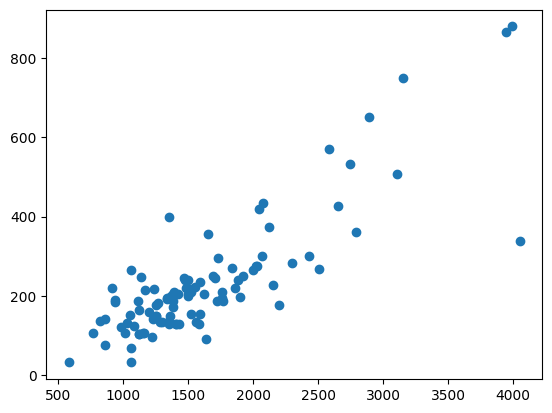

In [28]:
plt.scatter(houses['size'], houses['price'])
plt.show()

Part b. Find the correlation between the two variables.

In [31]:
houses.corr()['size']['price']

np.float64(0.8337847885586536)

Part c. Find and plot the regression line on top of the scatterplot. 

In [35]:
from sklearn.linear_model import LinearRegression

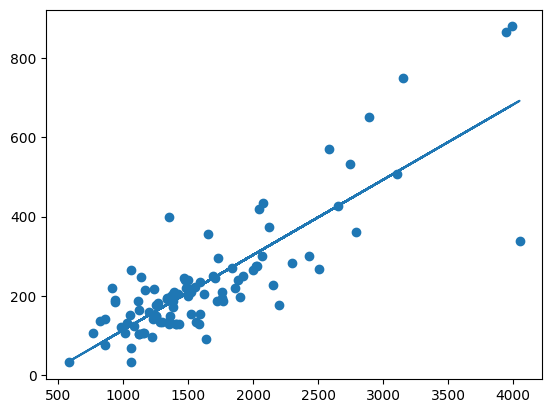

In [38]:
model = LinearRegression()
X = houses['size'].values.reshape(-1, 1)
y = houses['price'].values
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

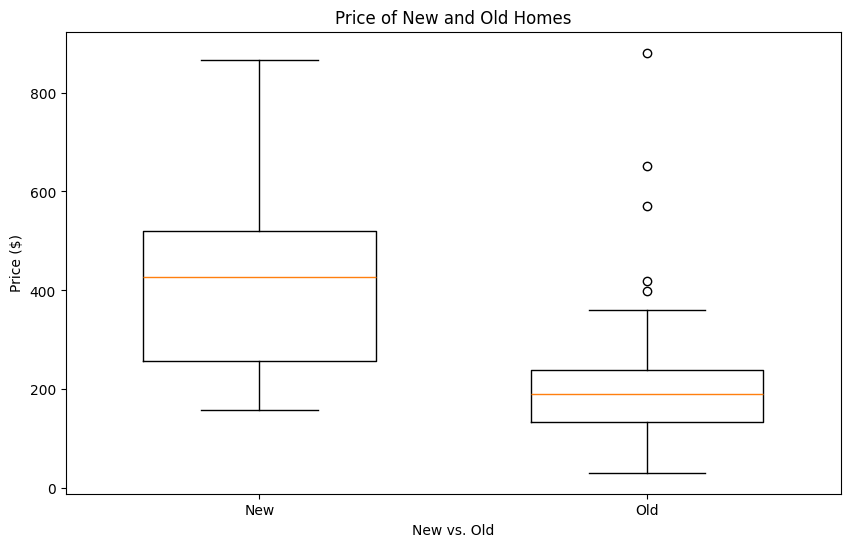

In [41]:
new_homes = houses[houses['new'] == 1]
old_homes = houses[houses['new'] == 0]

fig, ax = plt.subplots(figsize=(10, 6))

bp = ax.boxplot([new_homes['price'], old_homes['price']], positions=[1, 2], widths=0.6)

ax.set_xlabel('New vs. Old')
ax.set_ylabel('Price ($)')
ax.set_title('Price of New and Old Homes')
ax.set_xticks([1, 2])
ax.set_xticklabels(['New', 'Old'])

plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There's a strong positive correlation between size and price. A similar relationship exists between "newness" and price, as newer homes tend to be more expensive than older homes.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [46]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [47]:
happy

,subject happiness marital gender
0,1 1 1 male
1,2 1 1 male
2,3 1 1 male
3,4 1 1 male
4,5 1 1 male
...,...
2137,2138 3 3 female
2138,2139 3 3 female
2139,2140 3 3 female
2140,2141 3 3 female
